In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
#Read in the dataset from the ab_data.csv file and take a look at the top few rows here:
df = pd.read_csv('ab_data.csv')

In [3]:
#Use the cell below to find the number of rows in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
#The number of unique users in the dataset
df['user_id'].nunique()

290584

In [5]:
#The proportion of users converted
df['converted'].mean()

0.11965919355605512

In [6]:
#The number of times when the "group" is treatment but "landing_page" is not a new_page.
len(df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')])

1965

In [7]:
#Do any of the rows have missing values?
(df.isnull()).sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop((df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')]).index)
df2 = df2.drop((df[(df['group'] == 'control') & (df['landing_page'] != 'old_page')]).index)

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
#How many unique user_ids are in df2?
df2['user_id'].nunique()

290584

In [11]:
#There is one user_id repeated in df2. What is it?
duplicated_rows = df2[df2['user_id'].duplicated()]
duplicated_rows

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [12]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
nnew = (df['group'] == 'treatment') & (df['landing_page'] != 'new_page')
df2 = df.drop(df[nnew].index)

nold = (df2['group'] == 'control') & (df2['landing_page'] != 'old_page')
df2 = df2.drop(df2[nold].index)

df2.drop_duplicates(subset=['user_id'], keep='first', inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
duplicated_rows = df2[df2['user_id'].duplicated()]
duplicated_rows

,user_id,timestamp,group,landing_page,converted


In [13]:
#What is the probability of an individual converting regardless of the page they receive?
df['converted'].mean()

0.11965919355605512

In [14]:
#Given that an individual was in the control group, what is the probability they converted?
converted_control = df2.query('group=="control"')
convert_con =converted_control.query('converted ==True').user_id.nunique()/converted_control.user_id.nunique()
convert_con

0.1203863045004612

In [15]:
#Given that an individual was in the treatment group, what is the probability they converted?
converted_treatment= df2.query('group =="treatment"')
convert_treat = converted_treatment.query('converted==True').user_id.nunique()/converted_treatment.user_id.nunique()
convert_treat

0.11880806551510564

In [16]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = (convert_treat-convert_con)
obs_diff

-0.0015782389853555567

In [17]:
#What is the probability that an individual received the new page?
(df2['landing_page']=='new_page').mean()

0.5000619442226688

In [67]:
#What is the conversion rate for  𝑝𝑛𝑒𝑤 under the null hypothesis?
m=len(df2[(df2['landing_page']=='new_page')&(df2['converted'])])
r=len(df2[df2['landing_page']=='new_page'])
p_new =m/r
p_new

0.11880806551510564

In [68]:
#What is the conversion rate for  𝑝𝑜𝑙𝑑 under the null hypothesis?
t=len(df2[(df2['landing_page']=='old_page')&(df2['converted'])])
f=len(df2[df2['landing_page']=='old_page'])
p_old = t/f
p_old

0.1203863045004612

In [70]:
#What is  𝑛𝑛𝑒𝑤, the number of individuals in the treatment group?
n_new =(df2['group']=='treatment').sum()
n_new

145310

In [71]:
#What is  𝑛𝑜𝑙𝑑, the number of individuals in the control group?
n_old = (df2['group']=='control').sum()
n_old

145274

In [22]:
# Simulate a Sample for the treatment Group
results_treatment = np.random.choice(2,(df2['group']=='treatment').sum(),p=[m/r,1-m/r])
results_treatment

array([1, 1, 1, ..., 1, 1, 0])

In [72]:
# Simulate a Sample for the control Group
results_control = np.random.choice(2,(df2['group']=='control').sum(),p=[t/f,1-t/f])
results_control

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
#Find the difference in the "converted" probability  (𝑝′𝑛𝑒𝑤 -  𝑝′𝑜𝑙𝑑) for your simulated samples from the parts above.
results_treatment.mean()-results_control.mean()

8.77385421049759e-06

In [25]:
p_diffs = []
for _ in range(10000):
    boot = df2.sample(df2.shape[0],replace=True)
    converted_control = boot.query('group=="control"')
    converted_treatment= boot.query('group =="treatment"')
    control_converted_mean = converted_control.query('converted ==True').user_id.nunique()/converted_control.user_id.nunique()
    treatment_converted_mean = converted_treatment.query('converted==True').user_id.nunique()/converted_treatment.user_id.nunique()
    p_diffs.append(treatment_converted_mean - control_converted_mean)

(array([   5.,   50.,  319., 1230., 2566., 2965., 1983.,  709.,  158.,
          15.]),
 array([-0.00531312, -0.00460099, -0.00388886, -0.00317673, -0.0024646 ,
        -0.00175248, -0.00104035, -0.00032822,  0.00038391,  0.00109604,
         0.00180817]),
 <BarContainer object of 10 artists>)

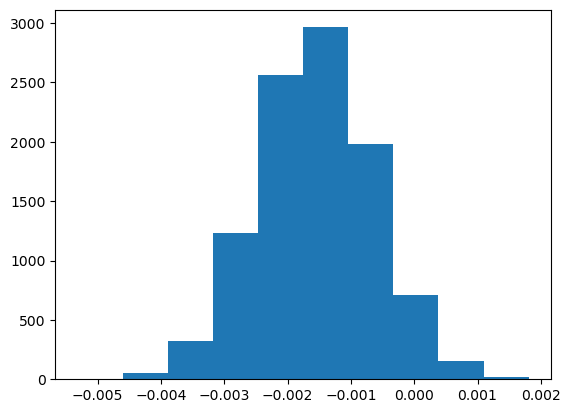

In [26]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color='red')

In [32]:
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0,p_diffs.std(),p_diffs.size)
(null_vals>obs_diff).mean()

0.9566

In [33]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = ((df2['converted'])&(df2['group']=='control')).sum()

# number of conversions with the new_page
convert_new = ((df2['converted'])&(df2['group']=='treatment ')).sum()

# number of individuals who were shown the old_page
n_old = (df['landing_page']=='old_page').sum()

# number of individuals who received new_page
n_new = (df['landing_page']=='new_page').sum()


In [65]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(convert_old,n_old,alternative='larger',value=0.5)
print(z_score, p_value)

-452.14128922534223 1.0


In [64]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(convert_new,n_new,alternative='larger',value = 0.5)
print(z_score, p_value)

-inf 1.0


In [40]:
df2[['treatment','control']] = pd.get_dummies(df2[['group']])
ab_page = df2[['treatment','control']]
ab_page['intercept']=1
ab_page.head()

C:\Users\moham\AppData\Local\Temp\ipykernel_19004\3467355521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_page['intercept']=1


,treatment,control,intercept
0,1,0,1
1,1,0,1
2,0,1,1
3,0,1,1
4,1,0,1


In [41]:
lm =sm.OLS(ab_page['control'],ab_page[['treatment','intercept']])
results = lm.fit()

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                control   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.845e+32
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:18:03   Log-Likelihood:             8.9234e+06
No. Observations:              290584   AIC:                        -1.785e+07
Df Residuals:                  290582   BIC:                        -1.785e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
treatment     -1.0000   4.14e-17  -2.42e+16      0.000      -1.000      -1.000
intercept      1.0000   2.92e-17   3.42e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                   989739.041   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48430.667
Skew:                          -0.000   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
countries = pd.read_csv('countries.csv')

In [44]:
df_merged = df2.join(countries,lsuffix='_caller', rsuffix='_other')

In [45]:
df_merged[['CA','UK','US']] = pd.get_dummies(df_merged['country'])
df_merged[['old_page','new_page']] = pd.get_dummies(df_merged['landing_page'])

In [46]:
df_merged['intercept']=1
lm = sm.OLS(df_merged['converted'],df_merged[['CA','UK','US']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              converted   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                          1.297e+04
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:20:35   Log-Likelihood:                         -85522.
No. Observations:              290584   AIC:                                  1.711e+05
Df Residuals:                  290581   BIC:                                  1.711e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CA             0.1169      0.003     43.054      0.000       0.112       0.122
UK             0.1203      0.001     99.005      0.000       0.118       0.123
US             0.1196      0.001    165.051      0.000       0.118       0.121
==============================================================================
Omnibus:                   125219.738   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           412005.949
Skew:                           2.339   Prob(JB):                         0.00
Kurtosis:                       6.485   Cond. No.                         3.75
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""